# Explore here

In [26]:
# Your code here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima

In [27]:
#cargar datos
url = 'https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv'
df = pd.read_csv(url)
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [28]:
#identificar tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [29]:
#convertir fecha a datetime
df['date'] = pd.to_datetime(df['date'])
ts = df.set_index('date')
ts

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633
...,...
2023-08-30 17:10:08.079328,989.600354
2023-08-31 17:10:08.079328,994.987326
2023-09-01 17:10:08.079328,995.814415


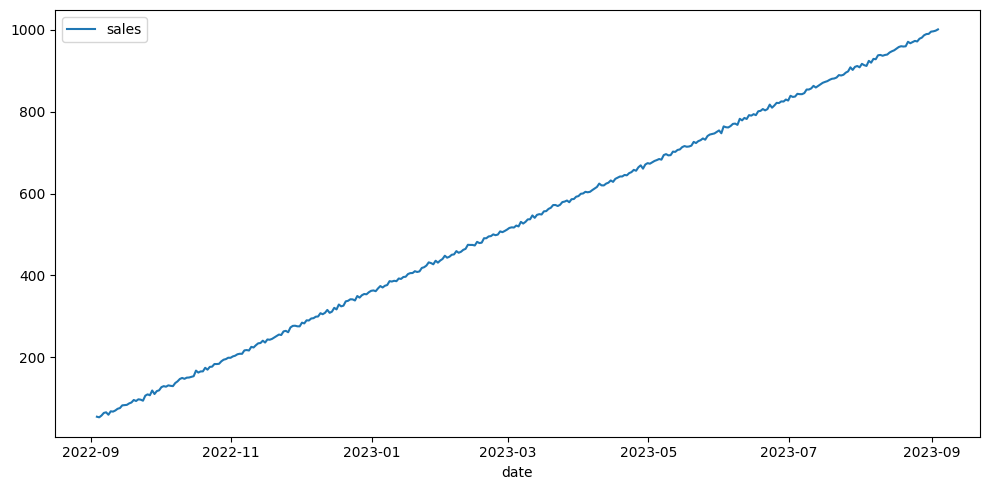

In [30]:
#graficar serie de tiempo
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

In [42]:
#Decomposicion de la serie
decomposition = seasonal_decompose(ts)
decomposition

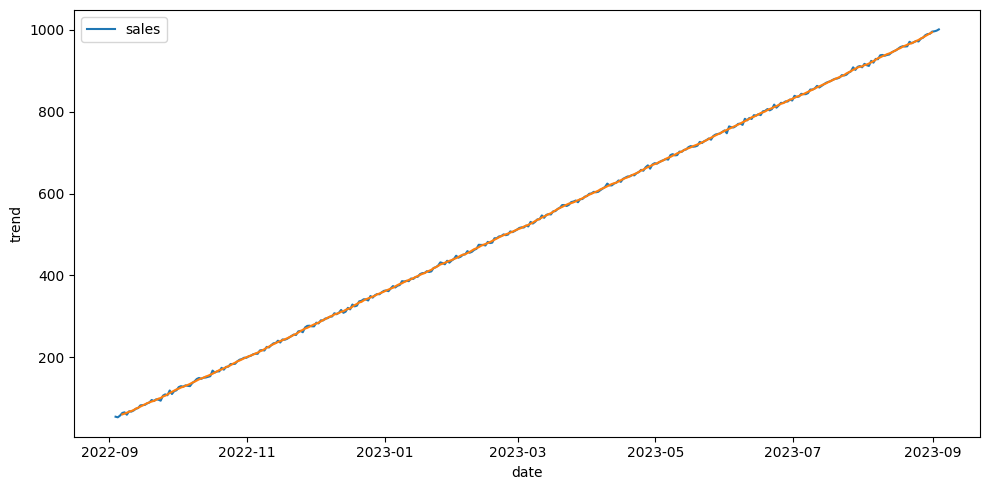

In [43]:
#trend analysis
fig, axis = plt.subplots(figsize = (10, 5))

trend = decomposition.trend
sns.lineplot(data = ts)
sns.lineplot(data= trend)

plt.tight_layout()
plt.show()

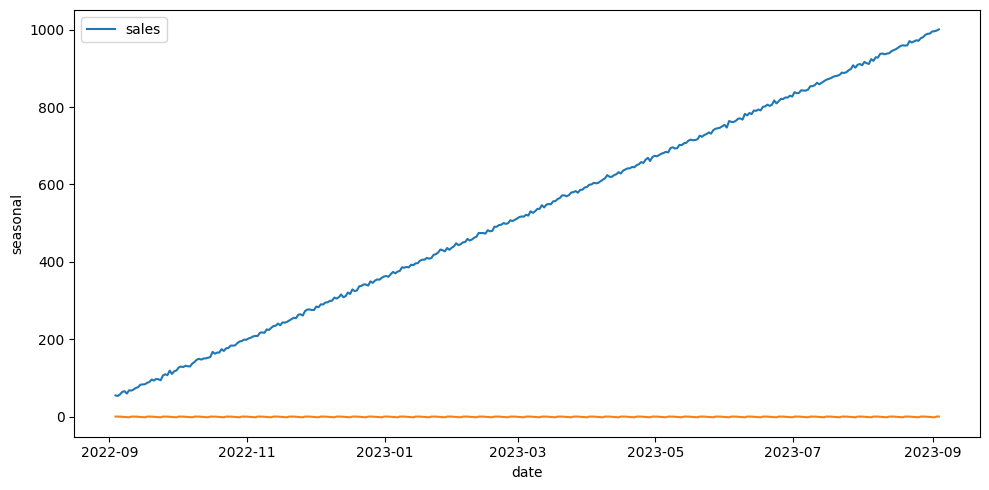

In [44]:
#seasonality analysis
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data=ts)
sns.lineplot(data=seasonal)

plt.tight_layout()
plt.show()

In [45]:
#stationarity analysis

def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64


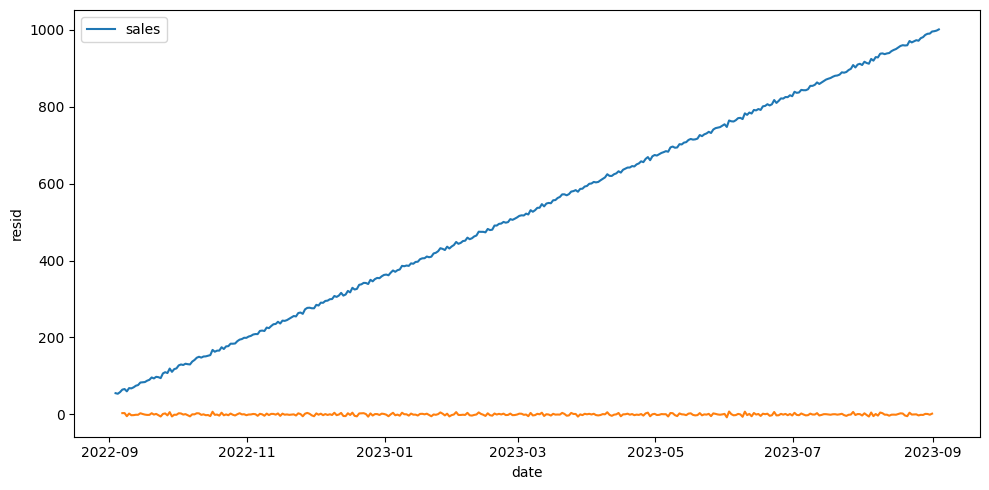

In [46]:
#variability analysis
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data=ts)
sns.lineplot(data=residual)

plt.tight_layout()
plt.show()

Step 2: Construct and analyze the time serie
Construct the valid data structure for the time serie, graph it, and then analyze it and answer the following questions:

Which is the tensor of the time serie?
Which is the trend?
Is it stationary?
Is there variability or noise?
Note: A tensor in a time serie is the minimum unit of time for which there is data. It can be every second, minute, hour, day, week, month...

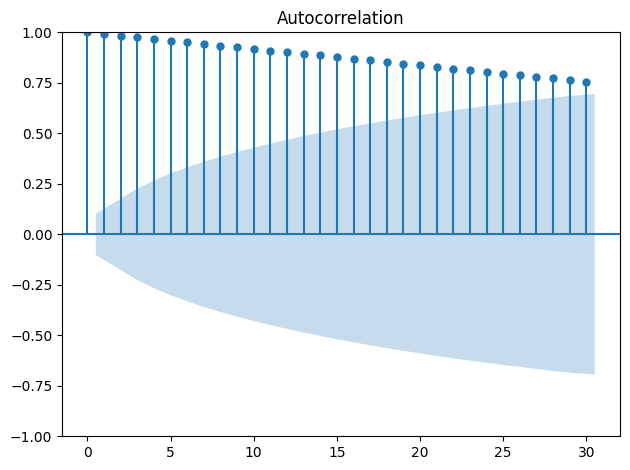

In [36]:
#autocorrelation analysis
plot_acf(ts, lags = 30)
plt.tight_layout()
plt.show()

- Tensor: Daily
- Trend: Positive
- Seasonality / Stationarity: Non-stationary (Dickey-Fuller Test p-value = 0.98)
- Variability: Low - Residuals relatively constant during the covered period
- Autocorrelation: High correlation, decreasing over time

In [ ]:
#train ARIMA
#make series stationary
ts_stationary = ts.diff().dropna()
test_stationarity(ts_stationary)

Results of Dickey-Fuller Test:
Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64


In [53]:
#model ARIMA
model = auto_arima(ts_stationary, seasonal = True, Trace= True, m = 7)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  365
Model:             SARIMAX(4, 0, 1)x(0, 0, 1, 7)   Log Likelihood                -912.097
Date:                           Sat, 08 Mar 2025   AIC                           1840.194
Time:                                   21:07:05   BIC                           1871.393
Sample:                               09-04-2022   HQIC                          1852.593
                                    - 09-03-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3839      0.303      7.876      0.000       1.791       2.977
ar.L1         -0.0277      0.052     -0.533      0.594      -0.129       0.074
ar.L2          0.0740      0.058      1.285      0.199      -0.039       0.187
ar.L3          0.0681      0.054      1.268      0.205      -0.037       0.173
ar.L4         -0.0314      0.051     -0.612      0.540      -0.132       0.069
ma.L1         -0.9822      0.020    -49.563      0.000      -1.021      -0.943
ma.S.L7        0.1504      0.053      2.859      0.004       0.047       0.253
sigma2         8.5189      0.676     12.600      0.000       7.194       9.844
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.82
Prob(Q):                              0.72   Prob(JB):                         0.66
Heteroskedasticity (H):               0.87   Skew:                             0.07
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
forecast = model.predict(90)
forecast

2023-09-04 17:10:08.079328    1.946942
2023-09-05 17:10:08.079328    2.750875
2023-09-06 17:10:08.079328    2.307227
2023-09-07 17:10:08.079328    2.933580
2023-09-08 17:10:08.079328    2.454103
                                ...   
2023-11-28 17:10:08.079328    2.599769
2023-11-29 17:10:08.079328    2.599769
2023-11-30 17:10:08.079328    2.599769
2023-12-01 17:10:08.079328    2.599769
2023-12-02 17:10:08.079328    2.599769
Freq: D, Length: 90, dtype: float64

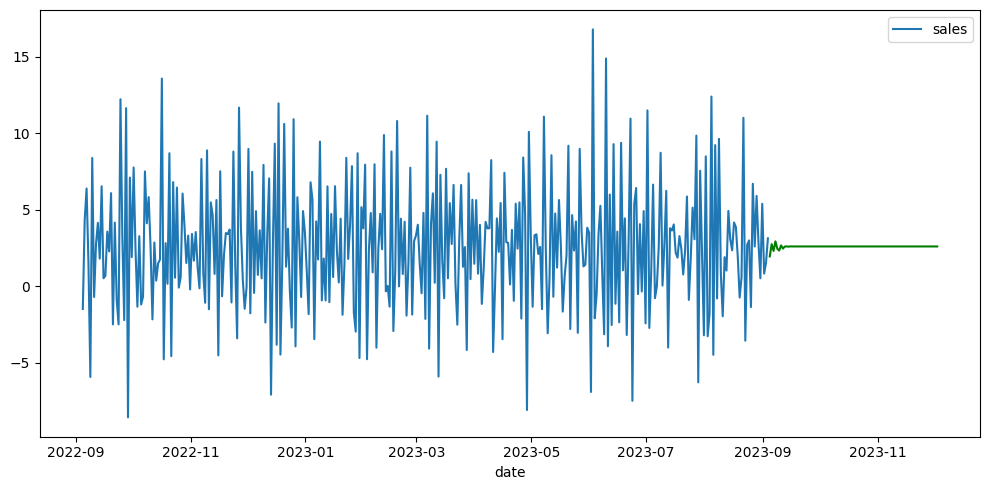

In [55]:
#compare predictions with test
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_stationary)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()